# FOCUS ON VIZ FOR PRESENTATION #

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

In [3]:
df = pd.read_csv('../datasets/Working Data/cleaned, mapped, dummied.csv')
pd.options.display.max_columns = 999

## EDA and ENGINEERING ##

In [23]:
# ESTABLISH BASELINE: 
price_mean = round(df['SalePrice'].mean())
price_median = round(df['SalePrice'].median())

print(f'The median price of a house in Ames, Iowa is ${price_median} and the mean price is ${price_mean}.')

The median price of a house in Ames, Iowa is $162500 and the mean price is $181479.


In [3]:
sum_column_2 = df['Full Bath'] + df['Bsmt Full Bath']
sum_column_3 = df['Half Bath'] + df['Bsmt Half Bath']
df['Total Baths'] = sum_column_2 + sum_column_3

In [4]:
#create total Fin SF column
sum_column = df['1st Flr SF'] + df['2nd Flr SF']
sum_column_2 = df['BsmtFin SF 1'] + df['BsmtFin SF 2']
df['Total Fin SF'] = sum_column + sum_column_2

In [5]:
#create sqft/dollar column
df['Dollars Per SF'] = df['SalePrice']/df['Total Fin SF']

Text(0.5, 1.0, 'Top 15 Features Correlation Heatmap')

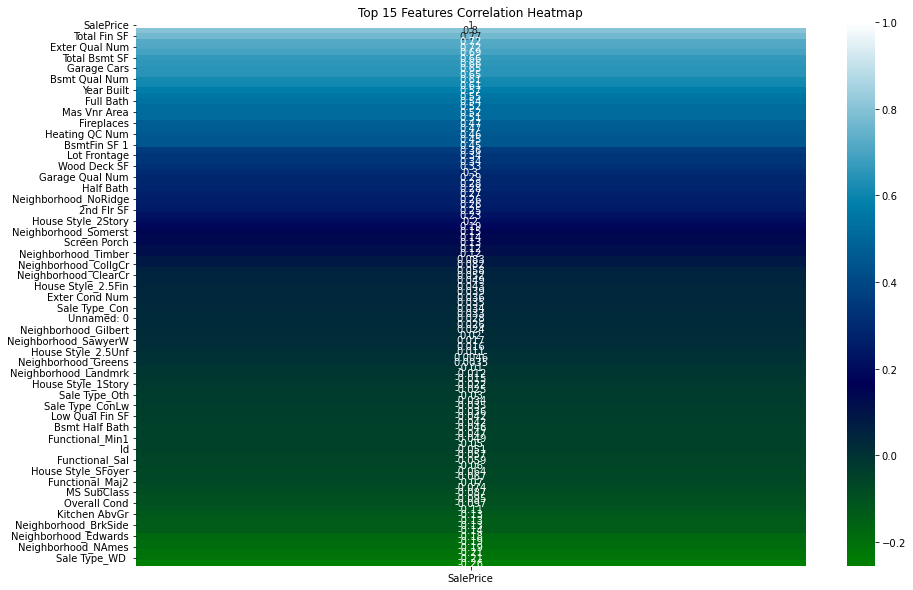

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='ocean')
plt.title('Top 15 Features Correlation Heatmap')
#plt.savefig('./images/ocean top_15 corr');

In [7]:
df.head()

,Unnamed: 0,1st Flr SF,2nd Flr SF,3Ssn Porch,Alley,Bedroom AbvGr,Bldg Type,Bsmt Cond,Bsmt Exposure,Bsmt Full Bath,Bsmt Half Bath,Bsmt Qual,Bsmt Unf SF,BsmtFin SF 1,BsmtFin SF 2,BsmtFin Type 1,BsmtFin Type 2,Central Air,Condition 1,Condition 2,Electrical,Enclosed Porch,Exter Cond,Exter Qual,Exterior 1st,Exterior 2nd,Fence,Fireplace Qu,Fireplaces,Foundation,Full Bath,Garage Area,Garage Cars,Garage Cond,Garage Finish,Garage Qual,Garage Type,Garage Yr Blt,Gr Liv Area,Half Bath,Heating,Heating QC,Id,Kitchen AbvGr,Kitchen Qual,Land Contour,Land Slope,Lot Area,Lot Config,Lot Frontage,Lot Shape,Low Qual Fin SF,MS SubClass,MS Zoning,Mas Vnr Area,Mas Vnr Type,Misc Feature,Misc Val,Mo Sold,Open Porch SF,Overall Cond,Overall Qual,PID,Paved Drive,Pool Area,Pool QC,Roof Matl,Roof Style,SalePrice,Screen Porch,Street,TotRms AbvGrd,Total Bsmt SF,Utilities,Wood Deck SF,Year Built,Year Remod/Add,Yr Sold,Bsmt Cond Num,Bsmt Qual Num,Garage Cond Num,Garage Qual Num,Exter Cond Num,Exter Qual Num,Heating QC Num,Kitchen Qual Num,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Total Baths,Total Fin SF,Dollars Per SF
0,0,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,TA,192.0,533.0,0.0,GLQ,Unf,Y,RRAe,Norm,SBrkr,0,TA,Gd,HdBoard,Plywood,NaN,NaN,0,CBlock,2,475.0,2.0,TA,RFn,TA,Attchd,1976.0,1479,1,GasA,Ex,109,1,Gd,Lvl,Gtl,13517,CulDSac,68.878999,IR1,0,60,RL,289.0,BrkFace,NaN,0,3,44,8,6,533352170,Y,0,NaN,CompShg,Gable,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010,3,3,3,3,3,4,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.0,2012.0,64.860835
1,1,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,Gd,276.0,637.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,559.0,2.0,TA,RFn,TA,Attchd,1997.0,2122,1,GasA,Ex,544,1,Gd,Lvl,Gtl,11492,CulDSac,43.000000,IR1,0,60,RL,132.0,BrkFace,NaN,0,4,74,5,7,531379050,Y,0,NaN,CompShg,Gable,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009,3,4,3,3,3,4,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,4.0,2759.0,79.739036
2,2,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,TA,326.0,731.0,0.0,GLQ,Unf,Y,Norm,Norm,SBrkr,0,Gd,TA,VinylSd,VinylSd,NaN,NaN,0,CBlock,1,246.0,1.0,TA,Unf,TA,Detchd,1953.0,1057,0,GasA,TA,153,1,Gd,Lvl,Gtl,7922,Inside,68.000000,Reg,0,20,RL,0.0,None,NaN,0,1,52,7,5,535304180,Y,0,NaN,CompShg,Gable,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010,3,3,3,3,4,3,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2.0,1788.0,60.961969
3,3,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,Gd,384.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,NaN,NaN,0,PConc,2,400.0,2.0,TA,Fin,TA,BuiltIn,2007.0,1444,1,GasA,Gd,318,1,TA,Lvl,Gtl,9802,Inside,73.000000,Reg,0,60,RL,0.0,None,NaN,0,4,0,5,5,916386060,Y,0,NaN,CompShg,Gable,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010,3,4,3,3,3,3,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.0,1444.0,120.498615
4,4,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,Fa,676.0,0.0,0.0,Unf,Unf,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Plywood,NaN,NaN,0,PConc,2,484.0,2.0,TA,Unf,TA,Detchd,1957.0,

(array([ 42., 525., 816., 350., 168.,  79.,  40.,  16.,   6.,   7.]),
 array([ 12789. ,  72675.8, 132562.6, 192449.4, 252336.2, 312223. ,
        372109.8, 431996.6, 491883.4, 551770.2, 611657. ]),
 <BarContainer object of 10 artists>)

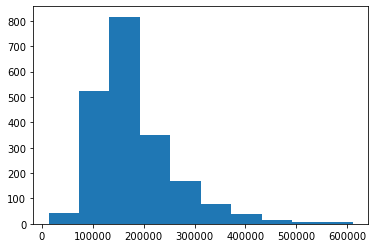

In [8]:
plt.hist(df['SalePrice'])

In [9]:
df['SalePrice'].describe()

count      2049.000000
mean     181479.018058
std       79295.913255
min       12789.000000
25%      129800.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Sale Price USD')

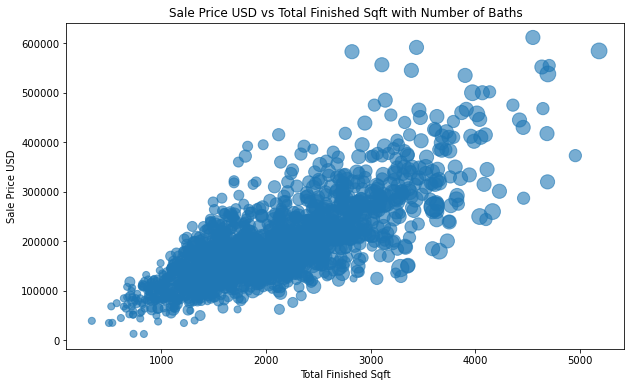

In [10]:
# Size
plt.figure(figsize=(10,6))
# Scatter plot
plt.scatter(df['Total Fin SF'], df['SalePrice'], alpha=.6, s=df['Total Baths'] * 50)
# Create a descriptive title
plt.title('Sale Price USD vs Total Finished Sqft with Number of Baths')

# Add axis labels
plt.xlabel('Total Finished Sqft')
plt.ylabel('Sale Price USD')
#plt.savefig('./images/Price by Total SF scatter');

In [11]:
# DROPPING COLUMNS THAT DO NOT CORRELATE DIRECTLY
df = df.drop(columns=['Garage Cars', '1st Flr SF', 'TotRms AbvGrd', 'Garage Yr Blt', 'Overall Qual', 'Total Bsmt SF', 'Full Bath', 'Unnamed: 0', 'Gr Liv Area', 'Bsmt Qual Num', 'Dollars Per SF', 'Mas Vnr Area', 'Garage Area'])

In [12]:
top_5 = df.corr()[['SalePrice']].sort_values(by='SalePrice',ascending=False).head()
top_5

,SalePrice
SalePrice,1.000000
Total Fin SF,0.765605
Exter Qual Num,0.715048
Kitchen Qual Num,0.694295
Total Baths,0.612089


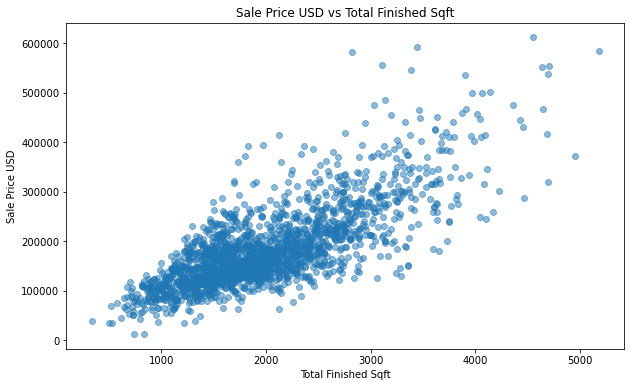

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['Total Fin SF'], df['SalePrice'], alpha=.5)
plt.title('Sale Price USD vs Total Finished Sqft')
plt.xlabel('Total Finished Sqft')
plt.ylabel('Sale Price USD')
#plt.savefig('./images/Price by SF scatter');

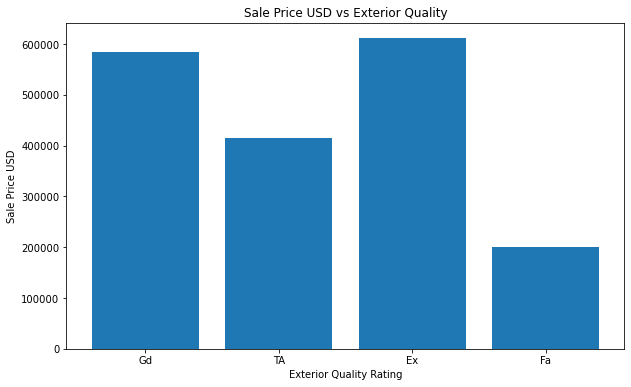

In [14]:
plt.figure(figsize=(10,6))
plt.bar(df['Exter Qual'].sort_index(), df['SalePrice'])
plt.title('Sale Price USD vs Exterior Quality')
plt.xlabel('Exterior Quality Rating')
plt.ylabel('Sale Price USD')
#order =result['Exter Qual']
#labels =['Excellent', 'Fair', 'Good', 'Average']
#plt.xticks(labels)
#plt.savefig('./images/Price by Exterior Quality bar');

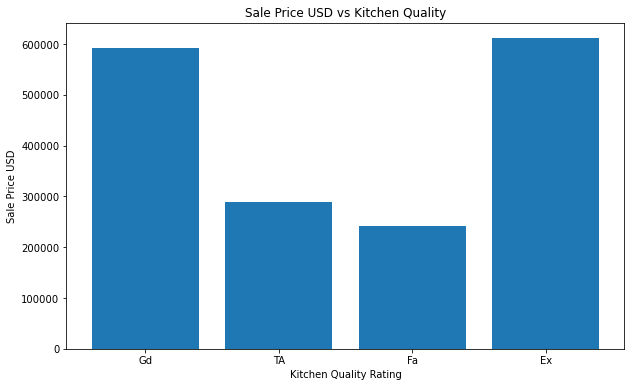

In [15]:
plt.figure(figsize=(10,6))
plt.bar(df['Kitchen Qual'], df['SalePrice'])
plt.title('Sale Price USD vs Kitchen Quality')
plt.xlabel('Kitchen Quality Rating')
plt.ylabel('Sale Price USD')
#plt.savefig('./images/Price by Kitchen Quality bar');

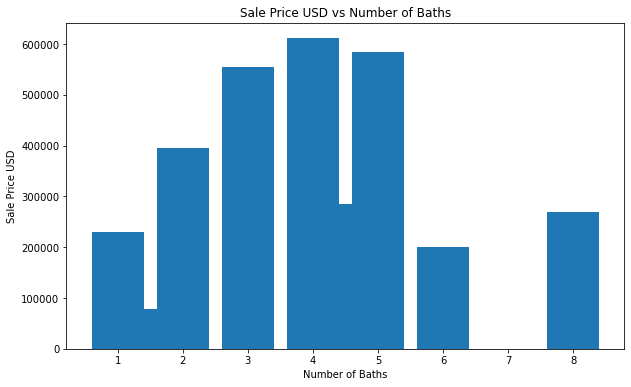

In [16]:
plt.figure(figsize=(10,6))
plt.bar(df['Total Baths'], df['SalePrice'])
plt.title('Sale Price USD vs Number of Baths')
plt.xlabel('Number of Baths')
plt.ylabel('Sale Price USD')
#plt.savefig('./images/Price by Baths bar');

# MODELING

In [18]:
# Create X and y.
features = ['Total Fin SF', 'Exter Qual Num',
       'Kitchen Qual Num','Total Baths']
# do this to add dummies? 
#X_train_dum = pd.get_dummies(X_train, columns=['day', 'month'], drop_first=True)
#or this? features.extend(neigh_dum)

X = df[features]
y = df['SalePrice']

# Instantiate 
lr = LinearRegression()

#check overall cross_val
cross_val_score(lr, X, y).mean()

0.789829761103969

In [19]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=33)
#fit
lr.fit(X_train, y_train)
#cross val train
cross_val_score(lr, X_train, y_train).mean()

0.7971307102054054

In [20]:
#train score
lr.score(X_train, y_train)

0.8003199904815578

In [21]:
#test score
lr.score(X_test, y_test)

0.7586722653565742

In [22]:
pred = lr.predict(X_test)
residuals = y_test - pred

 ASSESS:
 - train score = 80.0
 - test score = 75.9
 - cross_val score = 78.9
 looks like low variance, low on bias 

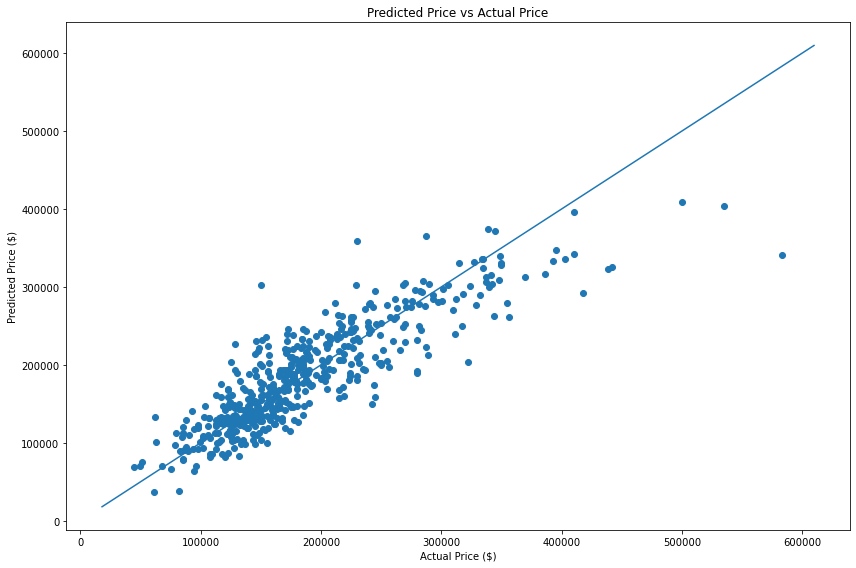

In [23]:
#Credit K Sylvia. Code given during work time
plt.figure(figsize = (12, 8))
plt.scatter(x = y_test, y = pred )
plt.title('Predicted Price vs Actual Price')
xpoints = ypoints = plt.xlim() # code borrowed from kilodalton's response on Stack Overflow
plt.plot(xpoints, ypoints)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.tight_layout();

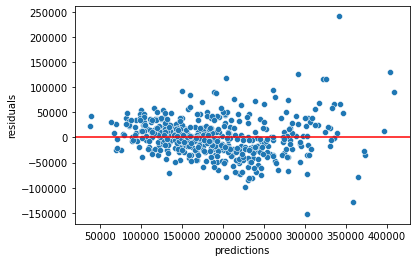

In [24]:
plt.axhline(y=0, color='r')
sns.scatterplot(x=pred, y=residuals)
('Residual Plot to Show error - Epsilon')
plt.xlabel('predictions')
plt.ylabel('residuals');

337.97104824255644

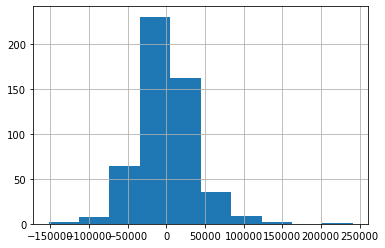

In [25]:
residuals.hist();
residuals.mean()

<AxesSubplot:>

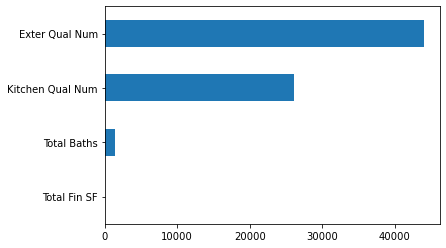

In [26]:
pd.Series(lr.coef_, index=features).sort_values().plot.barh()

In [27]:
#what's my RMSE?
np.sqrt(metrics.mean_squared_error(y_test, pred))

36775.26860961486

In [28]:
lr_coef = lr.coef_
lr_coef = pd.Series(lr_coef, X.columns)
lr_coef.sort_values(ascending=False)

Exter Qual Num      43972.215773
Kitchen Qual Num    26079.971859
Total Baths          1435.863158
Total Fin SF           57.921632
dtype: float64

### WHAT OUR COEFFICIENTS TELL US: ###

WITH ALL OTHER FACTORS CONSTANT:

- for every 1 rating unit of exterior quality, the price of a house increases by about $43972

- for every 1 rating unit of kitchen quality, the price of a house increases by about $26080

- for every 1 bath added, the price of a house increases by about $1436

- for every sqft added, the price of a house increases by about $58